# Problem 44
## Introduction to Probability Models Twelfth Edition 
### by Sheldon M. Ross
#### Page 283 

##### Imports

In [149]:
import pandas as pd
import numpy as np

from math import comb
import random
from numpy.random import choice
from numpy.linalg import matrix_power as matpow

import plotly.graph_objs as go
import plotly.subplots as sp

### Problem Introduciton

Suppose that a population consists of a fixed number, say, *m*, of genes in any generation. Each gene is one of two possible genetic types. 

If exactly *i* (of the *m*) genes of **any** generation are of type 1, then the next generation will have      *j* type 1 (and *m*-*j* type 2) genes with probability:

$\binom{m}{j} \left(\frac{i}{m}\right)^j \left(\frac{m-i}{m}\right)^{m-j}$ , *j* = 0, 1, 2,....., *m*

Let $\mathbb{X_n}$ denote the number of type 1 genes in the *n*th generation, and assume that   $\mathbb{X_0}$ = *i*.

(a) Find $\mathbb{E}[\mathbb{X}_n]$

(b) What is the probability that eventually all the genes will be type 1?

(c) Simulate the Markov chain for some specific values of m.

### Ideas to note

#### Binomial Distribution

The probability formula above is the probability mass function of a binomial random variable with parameters (*m*, *p*). 

*m* being the number of independent trials or our fixed population size in our case, while p is the probability of success. 

$p(x) = \binom{m}{x} p^x (1-p)^{m-x}$ , *x* = 0, 1, 2,...., *m* 

In our case:

*x* = *j*

*p* = $\frac{i}{m}$

#### Transition Matrix 

$P(\mathbb{X}_{n+1} = j|\mathbb{X}_n = i) = \binom{m}{j} \left(\frac{i}{m}\right)^j \left(\frac{m-i}{m}\right)^{m-j}$

We have three classes {0}, {1,2,...*m*-1}, and {*m*} similar to the equivelance classes in the gamblers ruin problem. 

Unlike the gamblers ruin problem the probabilities are not fixed but are state dependent.

The classes {0} and {m} are recurrent states and since they have a period of 1 they are absorbing states.

The class {1,2,....,*m*-1} are transient states.

In [2]:
# Create Transition Matrix
def create_transition_matrix(m):
    # create a matrix of all zeros of the desired size
    transition_matrix = np.zeros((m+1, m+1))
    
    # iterate through lists to get probabilities of all starting and next states
    # row = i or starting state, col = j or next state
    for row in range(m+1):
        for col in range(m+1):
            
            # Assign probabilites
            transition_matrix[row, col] = comb(m,col) * (row/m)**col * ((m-row)/m)**(m-col)
    
    # return a dataframe with the desired transition matrix
    return pd.DataFrame(transition_matrix, columns = list(range(m+1)), index = list(range(m+1)))

## Solutions

### (a) Find $\mathbb{E}[\mathbb{X}_n]$

### Setup

Since we know we have a binomial random variable we know that: 

$\mathbb{E}[\mathbb{x}]$ = *mp*

*p* = $\frac{i}{m}$

$\mathbb{E}[\mathbb{x}]$ = *m* * $\frac{i}{m}$ = *i*

### Raw Example:

*m* = 3 

*i* = 1

*p* = $\frac{1}{3}$

##### Using our probability function we can fill out our transition matrix

$P(\mathbb{X}_{n+1} = j|\mathbb{X}_n = i) = \binom{m}{j} \left(\frac{i}{m}\right)^j \left(\frac{m-i}{m}\right)^{m-j}$

$P$ = $\begin{align*} \begin{bmatrix} {1} & {0} & {0} & {0} \\ {0.296} & {0.444} & {0.222} & {0.037} \\ {0.037} & {0.222} & {0.444} & {0.296} \\ {0} & {0} & {0} & {1} \end{bmatrix} \end{align*} $

##### Expected value of the raw example

$\mathbb{E}[\mathbb{X}_1|\mathbb{X}_0 = 1]$ = 3 * $\frac{1}{3}$ = 1

$\mathbb{E}[\mathbb{X}_2|\mathbb{X}_0 = 1] = \mathbb{E}[\mathbb{X}_2|\mathbb{X}_1 = 0]$ * $P(\mathbb{X}_{1} = 0|\mathbb{X}_0 = 1)$ + $\mathbb{E}[\mathbb{X}_2|\mathbb{X}_1 = 1]$ * $P(\mathbb{X}_{1} = 1|\mathbb{X}_0 = 1)$ +

$\hspace{3cm} \mathbb{E}[\mathbb{X}_2|\mathbb{X}_1 = 2]$ * $P(\mathbb{X}_{1} = 2|\mathbb{X}_0 = 1)$ + $\mathbb{E}[\mathbb{X}_2|\mathbb{X}_1 = 3]$ * $P(\mathbb{X}_{1} = 3|\mathbb{X}_0 = 1)$

$\hspace{3cm}= 3 * \frac{0}{3} * \binom{3}{0} \left(\frac{1}{3}\right)^0 \left(\frac{2}{3}\right)^{3-0}$ + $3 * \frac{1}{3} * \binom{3}{1} \left(\frac{1}{3}\right)^1 \left(\frac{2}{3}\right)^{3-1}$ + $3 * \frac{2}{3} * \binom{3}{2} \left(\frac{1}{3}\right)^2 \left(\frac{2}{3}\right)^{3-2}$ + $3 * \frac{3}{3} * \binom{3}{3} \left(\frac{1}{3}\right)^3 \left(\frac{2}{3}\right)^{3-3}$ = 1

$\mathbb{E}[\mathbb{X}_n]$ = $\sum_{j=0}^{m} j * P_{i,j}^{n}$

In [3]:
def expected_value(m, i, n):
    # create our desired transition matrix
    transition_matrix = create_transition_matrix(m)
    
    # create our nth step transition matrix
    transition_matrix_nth_step = matpow(transition_matrix, n)
    
    # take a list of m + 1 values and multiply it by the ith row of the nth step transition matrix
    # sum the values
    expected_value = np.sum(np.arange(m+1) * transition_matrix_nth_step[i,])
    
    return round(expected_value)

$\mathbb{E}[\mathbb{X}_1|\mathbb{X}_0 = 1]$, where *m* = 3

In [4]:
expected_value(m=3, i=1, n=1)

1

$\mathbb{E}[\mathbb{X}_2|\mathbb{X}_0 = 1]$, where *m* = 3

In [5]:
expected_value(m=3, i=1, n=2)

1

$\mathbb{E}[\mathbb{X}_2|\mathbb{X}_0 = 2]$, where *m* = 3

In [6]:
expected_value(m=3, i=2, n=2)

2

$\mathbb{E}[\mathbb{X}_2|\mathbb{X}_0 = 2]$, where *m* = 4

In [7]:
expected_value(m=4, i=2, n=2)

2

$\mathbb{E}[\mathbb{X}_{100}|\mathbb{X}_0 = 27]$, where *m* = 51

In [8]:
expected_value(m=51, i=27, n=100)

27

### (b) What is the probability that eventually all genes will be type 1?

In population genetics, fixation is where a population has two variants of a particular gene and over time only one gene remains.

In [9]:
def matrix_power(m, n):
    return pd.DataFrame(matpow(create_transition_matrix(m),n))

### m = 3

In [10]:
matrix_power(m=3, n=1)

,0,1,2,3
0,1.000000,0.000000,0.000000,0.000000
1,0.296296,0.444444,0.222222,0.037037
2,0.037037,0.222222,0.444444,0.296296
3,0.000000,0.000000,0.000000,1.000000


In [11]:
matrix_power(m=3, n=10)

,0,1,2,3
0,1.000000,0.000000,0.000000,0.000000
1,0.657996,0.008671,0.008671,0.324663
2,0.324663,0.008671,0.008671,0.657996
3,0.000000,0.000000,0.000000,1.000000


In [12]:
matrix_power(m=3, n=1_000)

,0,1,2,3
0,1.000000,0.000000e+00,0.000000e+00,0.000000
1,0.666667,4.052387e-177,4.052387e-177,0.333333
2,0.333333,4.052387e-177,4.052387e-177,0.666667
3,0.000000,0.000000e+00,0.000000e+00,1.000000


In [13]:
matrix_power(m=3, n=10_000)

,0,1,2,3
0,1.000000,0.0,0.0,0.000000
1,0.666667,0.0,0.0,0.333333
2,0.333333,0.0,0.0,0.666667
3,0.000000,0.0,0.0,1.000000


### m = 10

In [14]:
matrix_power(m=10, n=1)

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,3.486784e-01,3.874205e-01,1.937102e-01,0.057396,0.011160,0.001488,0.000138,0.000009,3.645000e-07,9.000000e-09,1.000000e-10
2,1.073742e-01,2.684355e-01,3.019899e-01,0.201327,0.088080,0.026424,0.005505,0.000786,7.372800e-05,4.096000e-06,1.024000e-07
3,2.824752e-02,1.210608e-01,2.334744e-01,0.266828,0.200121,0.102919,0.036757,0.009002,1.446700e-03,1.377810e-04,5.904900e-06
4,6.046618e-03,4.031078e-02,1.209324e-01,0.214991,0.250823,0.200658,0.111477,0.042467,1.061683e-02,1.572864e-03,1.048576e-04
5,9.765625e-04,9.765625e-03,4.394531e-02,0.117188,0.205078,0.246094,0.205078,0.117188,4.394531e-02,9.765625e-03,9.765625e-04
6,1.048576e-04,1.572864e-03,1.061683e-02,0.042467,0.111477,0.200658,0.250823,0.214991,1.209324e-01,4.031078e-02,6.046618e-03
7,5.904900e-06,1.377810e-04,1.446700e-03,0.009002,0.036757,0.102919,0.200121,0.266828,2.334744e-01,1.210608e-01,2.824752e-02
8,1.024000e-07,4.096000e-06,7.372800e-05,0.000786,0.005505,0.026424,0.088080,0.201327,3.019899e-01,2.684355e-01,1.073742e-01
9,1.000000e-10,9.000000e-09,3.645000e-07,0.000009,0.000138,0.001488,0.011160,0.057396,1.937102e-01,3.874205e-01,3.486784e-01


In [15]:
matrix_power(m=10, n=1_000)

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,0.9,8.181679e-48,9.350764e-48,9.694774e-48,9.839932e-48,9.883687e-48,9.839932e-48,9.694774e-48,9.350764e-48,8.181679e-48,0.1
2,0.8,1.454521e-47,1.662358e-47,1.723515e-47,1.749321e-47,1.757100e-47,1.749321e-47,1.723515e-47,1.662358e-47,1.454521e-47,0.2
3,0.7,1.909058e-47,2.181845e-47,2.262114e-47,2.295984e-47,2.306194e-47,2.295984e-47,2.262114e-47,2.181845e-47,1.909058e-47,0.3
4,0.6,2.181781e-47,2.493537e-47,2.585273e-47,2.623982e-47,2.635650e-47,2.623982e-47,2.585273e-47,2.493537e-47,2.181781e-47,0.4
5,0.5,2.272688e-47,2.597435e-47,2.692993e-47,2.733314e-47,2.745469e-47,2.733314e-47,2.692993e-47,2.597435e-47,2.272688e-47,0.5
6,0.4,2.181781e-47,2.493537e-47,2.585273e-47,2.623982e-47,2.635650e-47,2.623982e-47,2.585273e-47,2.493537e-47,2.181781e-47,0.6
7,0.3,1.909058e-47,2.181845e-47,2.262114e-47,2.295984e-47,2.306194e-47,2.295984e-47,2.262114e-47,2.181845e-47,1.909058e-47,0.7
8,0.2,1.454521e-47,1.662358e-47,1.723515e-47,1.749321e-47,1.757100e-47,1.749321e-47,1.723515e-47,1.662358e-47,1.454521e-47,0.8
9,0.1,8.181679e-48,9.350764e-48,9.694774e-48,9.839932e-48,9.883687e-48,9.839932e-48,9.694774e-48,9.350764e-48,8.181679e-48,0.9


In [16]:
matrix_power(m=10, n=1_000_000)

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
2,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
3,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3
4,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4
5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
6,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6
7,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
8,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8
9,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9


$P(\mathbb{X}_{n+r} = m|\mathbb{X}_1 = j, \mathbb{X}_0 = i) \text{ for some } r > 1$ = $\frac{i}{m}$

### (c) Simulate the Markov Chain for some specific values of m.

In [148]:
def transition_probability(m, i, j):
    # calculate out the individual probability of j
    return (comb(m, j) * (i / m)**j * ((m - i) / m)**(m - j))

In [135]:
def simulate(m, i, generations):
    # list for collecting states
    states = [i]
    # loop through number of generations
    for _ in range(generations):
        # select our current state or last states in states list
        current_state = states[-1]
        # calculate our current probabilities of being in j given the current state
        probabilities = [transition_probability(m, current_state, j) for j in range(m+1)]
        # from a list of all possible j's choose a next state given the probabilities of j
        next_state = choice(np.arange(0, m+1), p=probabilities)
        # add that next state to our state list
        states.append(next_state)
    return states

In [153]:
def plot_simulation(m, i, generations, simulations):
    # simulate the process
    all_simulations = [simulate(m, i, generations) for _ in range(simulations)]
    # setup subplots for
    fig = sp.make_subplots(rows=10, cols=10, subplot_titles=[f"Sim {k+1}" for k in range(simulations)])
    # loop through simulations returns value and index of
    for idx, simulation in enumerate(all_simulations):
        # divmod return two values row is how many times 10 goes into the index and col is the remainder
        row, col = divmod(idx, 10)
        # add to account for 0
        row += 1
        col += 1
        # create individual plot
        trace = go.Scatter(x=np.arange(generations+1), y=simulation, mode='lines+markers')
        # add lines connecting dots
        fig.add_trace(trace, row=row, col=col)
    # set subplot size and title
    fig.update_layout(height=1000, width=1000, title_text="100 Simulations of Markov Chain with 10 Generations")
    # Show plot
    fig.show()

## m = 3

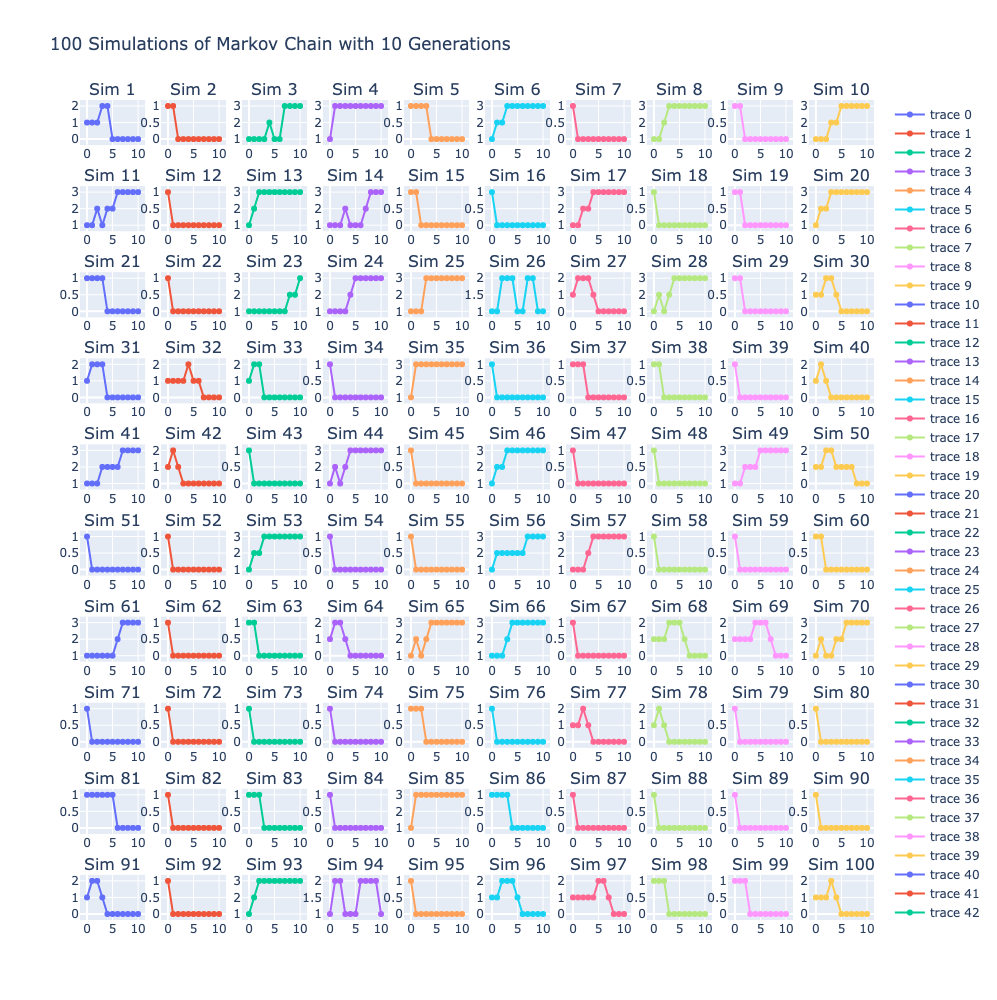

In [145]:
m = 3
i = 1
generations = 10  
simulations = 100  

plot_simulation_results(m, i, generations, simulations)

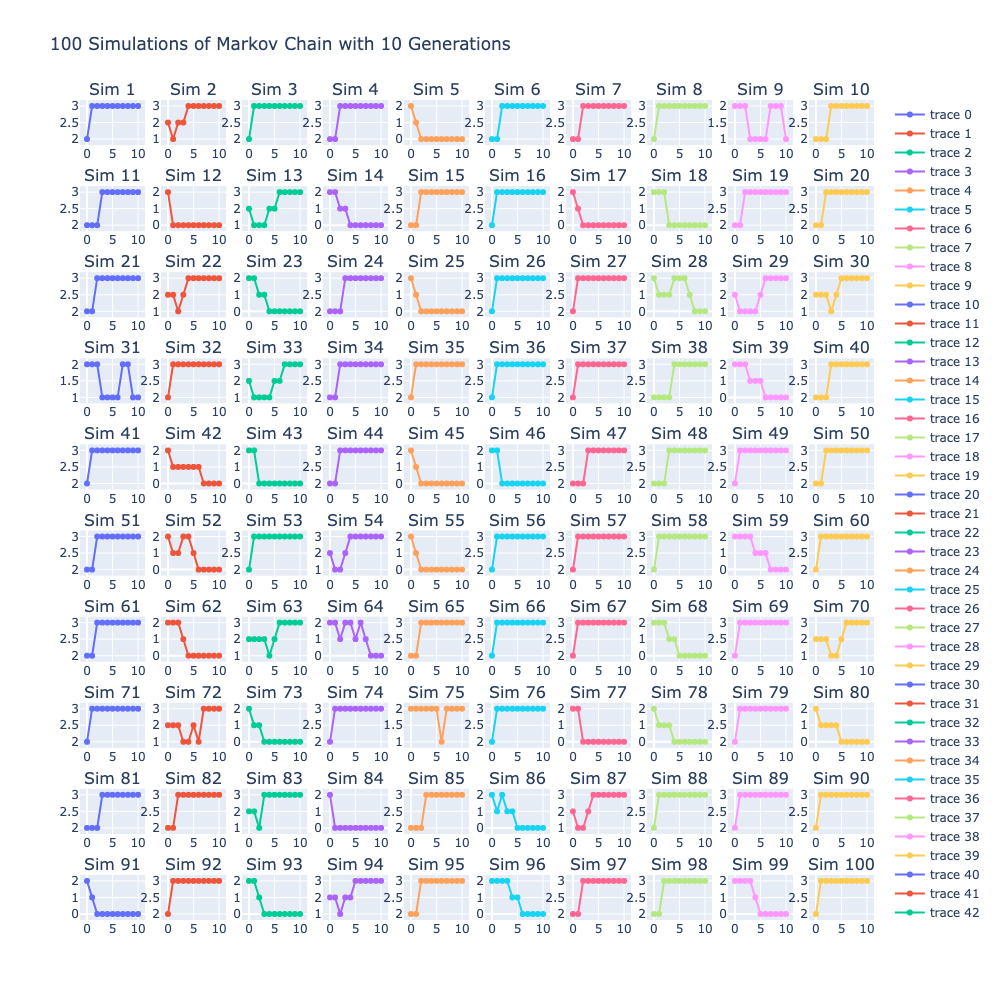

In [146]:
m = 3
i = 2
generations = 10  
simulations = 100  

plot_simulation_results(m, i, generations, simulations)

## m = 10

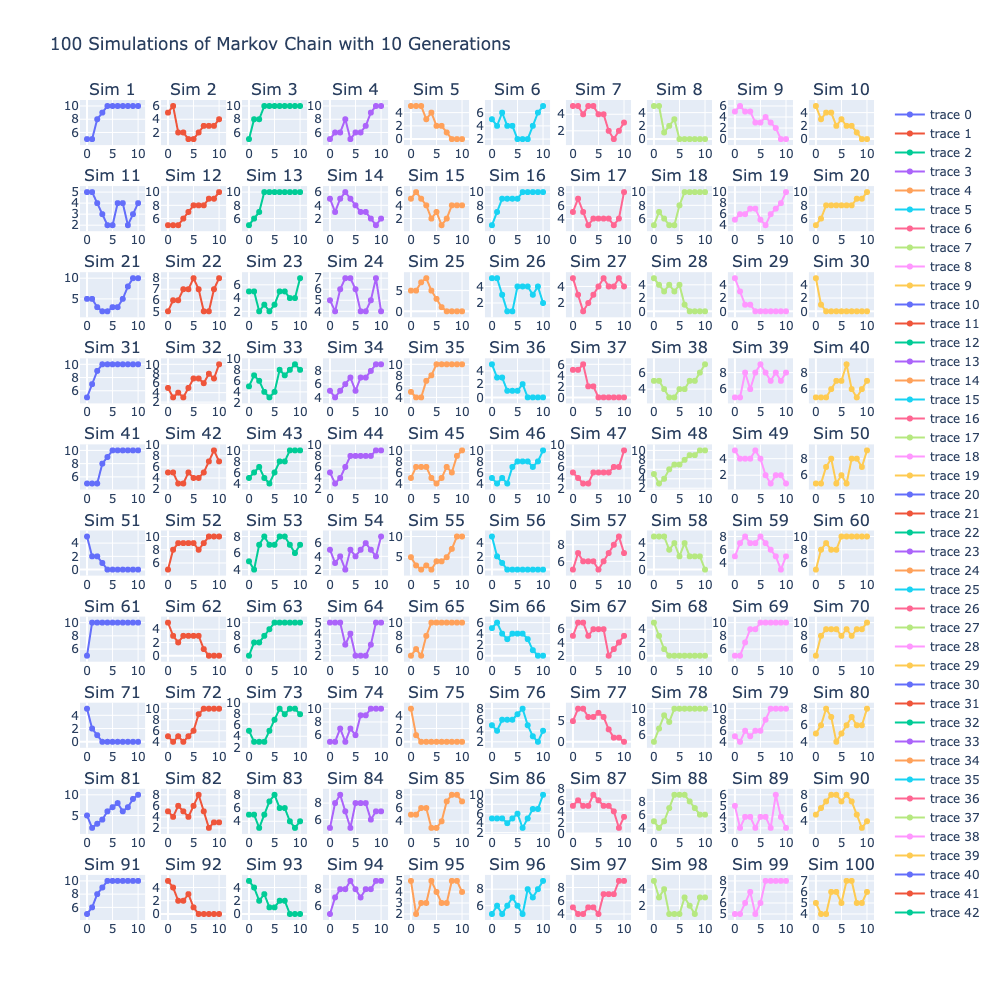

In [147]:
m = 10
i = 5
generations = 10  
simulations = 100  

plot_simulation_results(m, i, generations, simulations)